In [2]:
!pip install tensorflow keras sklearn matplotlib pandas pil

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [4]:
import os

In [5]:
os.getcwd()

'C:\\Users\\ACER'

In [6]:
d = r"C:\\Users\\ACER\\Downloads\\datasets\\Train"  #C:\Users\ACER\Downloads\archive (1)\Train

In [7]:
cd C:\Users\ACER\Downloads\datasets\Train 

C:\Users\ACER\Downloads\datasets\Train


In [8]:
# loading dataset
data = []
labels = []
classes = 43
cur_path = os.getcwd()
print(cur_path)
for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

C:\Users\ACER\Downloads\datasets\Train
(39209, 30, 30, 3) (39209,)


In [9]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [10]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [11]:
y_train.shape, y_test.shape

((31367, 43), (7842, 43))

In [12]:
train_data=pd.read_csv(r'C:\Users\ACER\Downloads\datasets\Train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv(r'C:\Users\ACER\Downloads\datasets\Test.csv',usecols=['ClassId','Path','Width','Height'],)
#"C:\Users\ACER\Downloads\datasets\Test.csv"
train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)

train_data.head()

,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [13]:
test_data.head()

,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [14]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


In [15]:
cd C:\Users\ACER\Downloads\datasets

C:\Users\ACER\Downloads\datasets


Text(0, 0.5, 'Number of images')

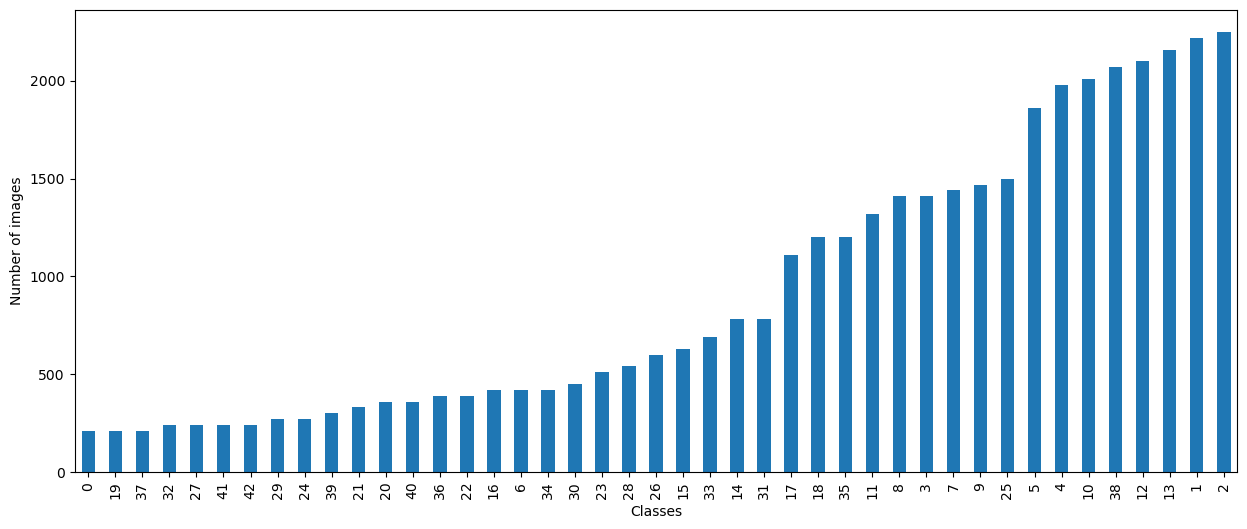

In [16]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes') 
plt.ylabel('Number of images')

In [17]:
#Building the model
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 9, 9, 32)          0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          18496     
                                                        

In [19]:
!pip install visualkeras
import visualkeras

C:\Users\ACER\anaconda3\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


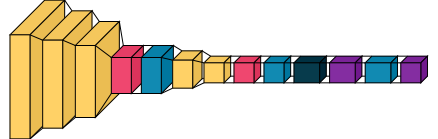

In [20]:
visualkeras.layered_view(model)

In [21]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/20
491/491 [==============================] - 93s 187ms/step - loss: 2.3582 - accuracy: 0.4051 - val_loss: 0.5682 - val_accuracy: 0.8407
Epoch 2/20
491/491 [==============================] - 89s 181ms/step - loss: 0.6761 - accuracy: 0.8072 - val_loss: 0.2493 - val_accuracy: 0.9366
Epoch 3/20
491/491 [==============================] - 83s 170ms/step - loss: 0.3813 - accuracy: 0.8947 - val_loss: 0.1131 - val_accuracy: 0.9693
Epoch 4/20
491/491 [==============================] - 83s 170ms/step - loss: 0.2641 - accuracy: 0.9265 - val_loss: 0.0933 - val_accuracy: 0.9728
Epoch 5/20
491/491 [==============================] - 86s 175ms/step - loss: 0.2125 - accuracy: 0.9410 - val_loss: 0.0672 - val_accuracy: 0.9811
Epoch 6/20
491/491 [==============================] - 82s 167ms/step - loss: 0.2001 - accuracy: 0.9444 - val_loss: 0.0537 - val_accuracy: 0.9846
Epoch 7/20
491/491 [==============================] - 86s 175ms/step - loss: 0.1839 - accuracy: 0.9503 - val_loss: 0.0672 - val_ac

C:\Users\ACER\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


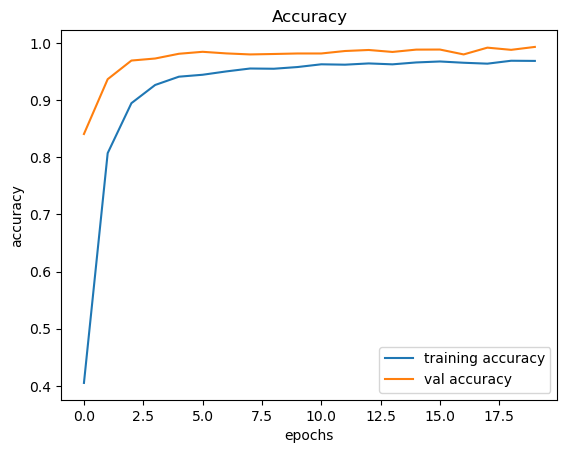

In [22]:
#plotting graphs for accuracy 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

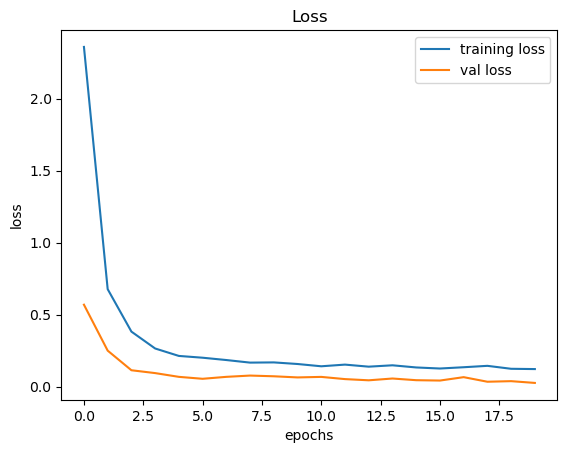

In [23]:

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [24]:
# Score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.025062337517738342
Test accuracy 0.9931139945983887


In [25]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

246/246 [==============================] - 3s 12ms/step


In [26]:

from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        38
           1       0.98      0.99      0.99       496
           2       0.98      0.98      0.98       420
           3       1.00      0.99      0.99       294
           4       0.99      0.99      0.99       400
           5       0.97      0.99      0.98       364
           6       1.00      1.00      1.00        69
           7       1.00      1.00      1.00       313
           8       0.99      0.99      0.99       274
           9       1.00      1.00      1.00       277
          10       1.00      1.00      1.00       398
          11       0.99      1.00      0.99       261
          12       1.00      1.00      1.00       443
          13       1.00      1.00      1.00       422
          14       1.00      1.00      1.00       135
          15       1.00      1.00      1.00       118
          16       1.00      1.00      1.00        86
          17       1.00    

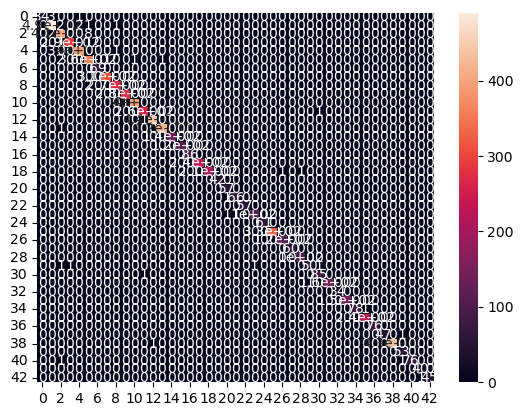

In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_class)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h1.png')

In [28]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)
score

0.9931140015302219

In [29]:
model.save('traffic_classifier.h5')

C:\Users\ACER\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy as np  # Note the change here

# Load the trained model to classify signs
from keras.models import load_model
model = load_model('traffic_classifier.h5')

# Dictionary to label all traffic signs classes.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

# Initialise GUI
top = tk.Tk()
top.geometry('800x600')
top.title('Traffic Sign Classification')
top.configure(background='#CDCDCD')

label = Label(top, background='#CDCDCD', font=('arial', 15, 'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30, 30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    
    # Updated prediction method
    pred = np.argmax(model.predict([image]), axis=-1)[0]
    
    sign = classes[pred + 1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b = Button(top, text="Classify Image", command=lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
    classify_b.place(relx=0.79, rely=0.46)

def upload_image():
    try:
        file_path = filedialog.askopenfilename()
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/4.25), (top.winfo_height()/4.25)))
        im = ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image = im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload = Button(top, text="Upload an image", command=upload_image, padx=30, pady=10)
upload.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))

upload.pack(side=BOTTOM, pady=50)
sign_image.pack(side=BOTTOM, expand=True)
label.pack(side=BOTTOM, expand=True)
heading = Label(top, text="Know Your Traffic Sign", pady=20, font=('arial', 20, 'bold'))
heading.configure(background='#CDCDCD', foreground='#364156')
heading.pack()

top.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\ACER\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\ACER\AppData\Local\Temp\ipykernel_1680\2897471259.py", line 80, in <lambda>
    classify_b = Button(top, text="Classify Image", command=lambda: classify(file_path), padx=10, pady=5)
  File "C:\Users\ACER\AppData\Local\Temp\ipykernel_1680\2897471259.py", line 73, in classify
    pred = np.argmax(model.predict([image]), axis=-1)[0]
  File "C:\Users\ACER\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\ACER\AppData\Local\Temp\__autograph_generated_fileiq_0lsq6.py", line 15, in tf__predict_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "C:\Users\ACER\anaconda3\lib\site-packages\keras\src\eng

1/1 [==============================] - 0s 80ms/step
Road work
1/1 [==============================] - 0s 16ms/step
Speed limit (80km/h)
1/1 [==============================] - 0s 22ms/step
Speed limit (80km/h)
